In [1]:
!pip install openpyxl


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, TensorDataset
# 指定文件路径
file_path = '附件一（训练集）.xlsx'

# 使用pandas的read_excel函数读取数据
df = pd.read_excel(file_path)

# 显示数据框架的前几行，以确保数据被正确读取
print(df.head())

   温度，oC  频率，Hz    磁芯损耗，w/m3 励磁波形  0（磁通密度B，T）         1         2         3  \
0     25  50030  1997.955250  正弦波    0.000213  0.000389  0.000566  0.000743   
1     25  50020  2427.749830  正弦波   -0.000551 -0.000358 -0.000165  0.000028   
2     25  50020  3332.725760  正弦波   -0.003780 -0.003564 -0.003349 -0.003134   
3     25  50020  4502.908007  正弦波   -0.000511 -0.000267 -0.000023  0.000222   
4     25  50030  6063.023248  正弦波    0.000458  0.000732  0.001007  0.001281   

          4         5  ...      1014      1015      1016      1017      1018  \
0  0.000919  0.001096  ... -0.001551 -0.001374 -0.001198 -0.001022 -0.000846   
1  0.000221  0.000413  ... -0.002476 -0.002284 -0.002091 -0.001899 -0.001707   
2 -0.002919 -0.002704  ... -0.005927 -0.005713 -0.005499 -0.005285 -0.005070   
3  0.000466  0.000711  ... -0.002950 -0.002707 -0.002463 -0.002220 -0.001976   
4  0.001555  0.001830  ... -0.002290 -0.002016 -0.001741 -0.001466 -0.001192   

       1019      1020      1021      1022   

In [3]:
# 读取特定的工作表，可以是工作表的名称或索引
df1 = pd.read_excel(file_path, sheet_name='材料3')
df1=df1[df['励磁波形']=='正弦波']
df1

C:\Users\74860\AppData\Local\Temp\ipykernel_20556\4080877758.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1=df1[df['励磁波形']=='正弦波']


,温度，oC,频率，Hz,磁芯损耗，w/m3,励磁波形,0（磁通密度B，T）,1,2,3,4,5,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,25,50020,4489.278556,正弦波,-0.001622,-0.001429,-0.001236,-0.001044,-0.000851,-0.000659,...,-0.003541,-0.003350,-0.003158,-0.002967,-0.002775,-0.002584,-0.002392,-0.002200,-0.002007,-0.001815
1,25,50020,14225.895340,正弦波,-0.003595,-0.003283,-0.002973,-0.002663,-0.002352,-0.002041,...,-0.006690,-0.006381,-0.006073,-0.005764,-0.005455,-0.005147,-0.004837,-0.004527,-0.004217,-0.003907
2,25,50020,23960.767060,正弦波,-0.002541,-0.002153,-0.001765,-0.001379,-0.000993,-0.000607,...,-0.006398,-0.006014,-0.005630,-0.005246,-0.004860,-0.004473,-0.004087,-0.003701,-0.003314,-0.002928
3,25,50020,42287.304910,正弦波,0.005448,0.005945,0.006442,0.006940,0.007438,0.007936,...,0.000470,0.000968,0.001466,0.001963,0.002461,0.002959,0.003457,0.003955,0.004452,0.004949
4,25,50020,69399.349400,正弦波,0.006187,0.006813,0.007438,0.008063,0.008686,0.009307,...,-0.000050,0.000574,0.001198,0.001822,0.002447,0.003070,0.003694,0.004317,0.004939,0.005562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,25,499970,442906.459300,三角波,-0.027379,-0.026581,-0.025784,-0.024988,-0.024195,-0.023406,...,-0.034883,-0.034274,-0.033599,-0.032878,-0.032125,-0.031349,-0.030561,-0.029769,-0.028974,-0.028177
1063,25,499980,732242.132200,三角波,-0.033567,-0.032566,-0.031567,-0.030571,-0.029579,-0.028591,...,-0.043135,-0.042320,-0.041435,-0.040502,-0.039537,-0.038554,-0.037562,-0.036566,-0.035568,-0.034568
1064,25,79440,11881.601050,三角波,-0.037085,-0.036693,-0.036304,-0.035915,-0.035528,-0.035140,...,-0.037685,-0.037777,-0.037867,-0.037948,-0.038013,-0.038054,-0.038050,-0.037958,-0.037758,-0.037456
1065,25,79430,21004.585670,三角波,-0.046816,-0.046321,-0.045829,-0.045338,-0.044848,-0.044360,...,-0.047815,-0.047930,-0.048038,-0.048130,-0.048198,-0.048223,-0.048162,-0.047983,-0.047688,-0.047288


In [4]:
import numpy as np
last_1024_columns = df1.iloc[:, -1024:]
df1=df1.iloc[:, :-1025]
# 计算每一行的最大值
df1['B'] = last_1024_columns.max(axis=1)
new_column_names = {
    '温度，oC': 'T',
    '频率，Hz': 'F',
    '磁芯损耗，w/m3': 'P',
    'B': 'B'
}
df1 = df1.rename(columns=new_column_names)
df1[['T','F','P', 'B']] = np.log(df1[['T','F','P', 'B']])
df1

,T,F,P,B
0,3.218876,10.820178,8.409447,-3.449336
1,3.218876,10.820178,9.562819,-2.976467
2,3.218876,10.820178,10.084173,-2.752239
3,3.218876,10.820178,10.652242,-2.510758
4,3.218876,10.820178,11.147633,-2.296822
...,...,...,...,...
1062,3.218876,13.122303,13.001114,-3.247474
1063,3.218876,13.122323,13.503867,-3.021861
1064,3.218876,11.282757,9.382746,-3.248217
1065,3.218876,11.282631,9.952496,-3.013111


In [5]:
import numpy as np
from scipy.optimize import curve_fit

# 定义模型函数
def model_func(X, A, C, D):
    F,B=X
    return A * np.power(F, C) * np.power(B, D)

# 假设你有一些数据
F = np.array(df1['F'])  # 自变量F的值
B = np.array(df1['B'])  # 自变量B的值
P = np.array(df1['P'])  # 因变量P的值

# 将自变量组合成一个二维数组
X_data = np.vstack((F, B))

# 使用curve_fit进行拟合
params, covariance = curve_fit(model_func, X_data, P, p0=[1, 1, 1])

A, C, D = params
df1['ypred1']=A * F**C * B**D
mse1 = ((df1['P'] - df1['ypred1']) ** 2).mean()
mse1

C:\Users\74860\AppData\Local\Temp\ipykernel_20556\1040560344.py:7: RuntimeWarning: invalid value encountered in power
  return A * np.power(F, C) * np.power(B, D)
C:\Users\74860\AppData\Local\Temp\ipykernel_20556\1040560344.py:18: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(model_func, X_data, P, p0=[1, 1, 1])


nan

In [6]:
y=df1['P'].values
X=df1[['T','F','B']].values
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.00001, random_state=42)
if torch.cuda.is_available():
    train_dataset = TensorDataset(X_train.to('cuda:0'), y_train.to('cuda:0'))
    test_dataset = TensorDataset(X_test.to('cuda:0'), y_test.to('cuda:0'))

# 创建一个字典来存储数据集
dataset = {
    'train_input': train_dataset.tensors[0],
    'test_input': test_dataset.tensors[0],
    'train_label': train_dataset.tensors[1],
    'test_label':test_dataset.tensors[1]
}
dataset

{'train_input': tensor([[ 4.2485, 10.8202, -1.6347],
         [ 3.9120, 13.1247, -3.4885],
         [ 3.9120, 10.8204, -3.6877],
         ...,
         [ 3.9120, 11.5124, -1.4342],
         [ 3.2189, 12.6650, -4.1538],
         [ 4.2485, 10.8202, -2.5224]], device='cuda:0'),
 'test_input': tensor([[ 4.4998, 10.8202, -1.4006]], device='cuda:0'),
 'train_label': tensor([[12.1290],
         [11.4211],
         [ 7.1741],
         ...,
         [13.7107],
         [10.0067],
         [ 9.7084]], device='cuda:0'),
 'test_label': tensor([[12.7323]], device='cuda:0')}

In [7]:
import torch
torch.set_default_dtype(torch.float64) # 设置默认张量数据类型为双精度浮点数
torch.manual_seed(33) # 设置随机数种子为33
from kan import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# 创建一个KAN模型：
# 输入维度为2，输出维度为1，隐藏层有5个神经元
# 使用三次样条（k=3），将输入空间划分为5个网格间隔（grid=5）
# 设置随机数种子为0
model = KAN(width=[3,5,1], grid=5, k=3, seed=0,device=device)

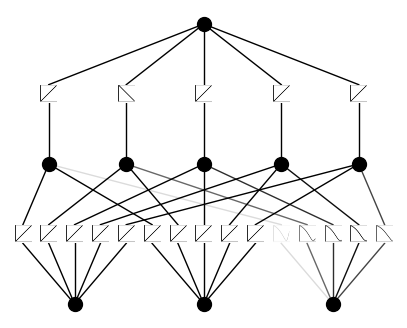

In [8]:
# 绘制初始化时的KAN模型图形
model(dataset['train_input']);
# 使用 plot 方法绘制模型的输出结果
# 设置 beta 参数为 100，用于控制平滑度
model.plot(beta=50)

In [9]:
# 对模型进行训练
# 使用 LBFGS 优化器
# 进行 20 步训练
# 设置正则化参数为 0.01
# 设置信息熵正则化参数为 10.0
# 在给定的设备上进行训练
model.train(dataset, opt="LBFGS", steps=40, lamb=0.01, lamb_entropy=10.,device=device);

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]c:\Users\74860\Desktop\deep learning\kanmodel\kan\KAN.py:327: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.acts_scale_std.append(torch.std(postacts, dim=0))
train loss: 1.82e-01 | test loss: 2.08e-02 | reg: 3.74e+01 : 100%|██| 40/40 [00:15<00:00,  2.50it/s]


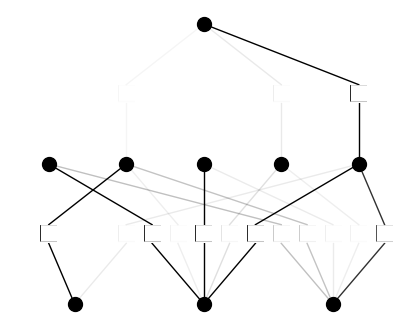

In [10]:
model.plot() # 使用 plot 方法绘制训练后的KAN模型

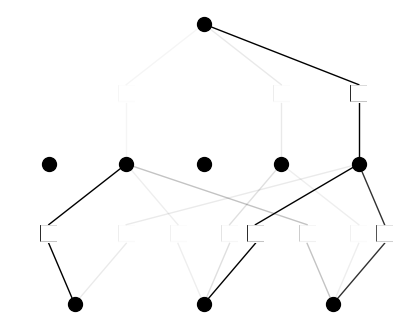

In [11]:
# 对KAN模型进行修剪
model.prune()
# 使用 plot 方法绘制修剪后的KAN模型
# 设置 mask=True 以保持原始形状
model.plot(mask=True)

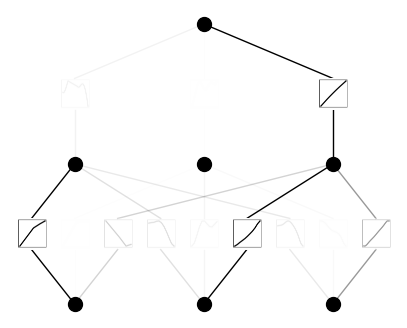

In [12]:
model = model.prune()
# 使用修剪后的模型对训练输入数据进行预测
model(dataset['train_input'])
# 使用 plot 方法绘制修剪后的KAN模型的输出结果
model.plot()

train loss: 1.79e-01 | test loss: 5.29e-02 | reg: 2.26e+01 : 100%|████| 5/5 [00:02<00:00,  2.30it/s]


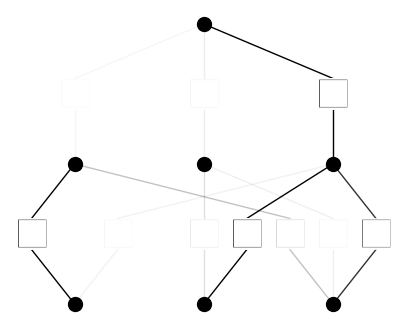

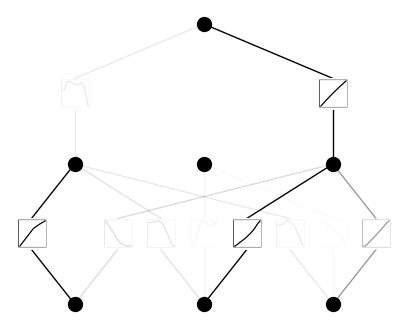

In [13]:
model.train(dataset, opt="LBFGS", steps=5, lamb=0.01, lamb_entropy=10.,device=device);
# 对KAN模型进行修剪
model.prune()
# 使用 plot 方法绘制修剪后的KAN模型
# 设置 mask=True 以保持原始形状
model.plot(mask=True)
model = model.prune()
# 使用修剪后的模型对训练输入数据进行预测
model(dataset['train_input'])
# 使用 plot 方法绘制修剪后的KAN模型的输出结果
model.plot()

train loss: 1.77e-01 | test loss: 8.79e-02 | reg: 2.14e+01 : 100%|██| 20/20 [00:06<00:00,  3.31it/s]


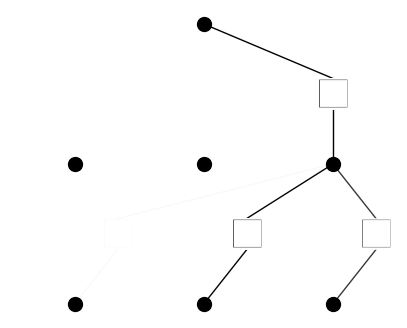

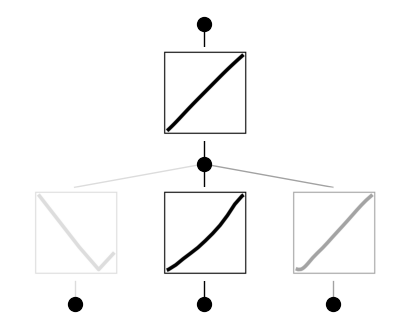

In [14]:
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.,device=device);
# 对KAN模型进行修剪
model.prune()
# 使用 plot 方法绘制修剪后的KAN模型
# 设置 mask=True 以保持原始形状
model.plot(mask=True)
model = model.prune()
# 使用修剪后的模型对训练输入数据进行预测
model(dataset['train_input'])
# 使用 plot 方法绘制修剪后的KAN模型的输出结果
model.plot()

train loss: 2.05e-01 | test loss: 1.12e-01 | reg: 1.29e+01 : 100%|██| 20/20 [00:04<00:00,  4.22it/s]


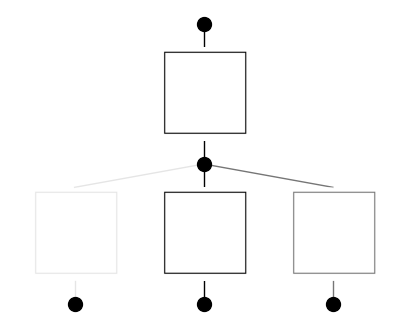

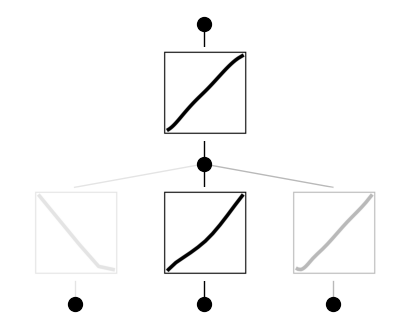

In [18]:
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.,device=device);
# 对KAN模型进行修剪
model.prune()
# 使用 plot 方法绘制修剪后的KAN模型
# 设置 mask=True 以保持原始形状
model.plot(mask=True)
model = model.prune()
# 使用修剪后的模型对训练输入数据进行预测
model(dataset['train_input'])
# 使用 plot 方法绘制修剪后的KAN模型的输出结果
model.plot()

In [18]:
X_train

tensor([[ 4.2485, 11.7429, -2.9003],
        [ 3.2189, 11.8584, -1.5268],
        [ 3.2189, 11.3973, -3.9276],
        ...,
        [ 3.2189, 11.5124, -1.5167],
        [ 4.4998, 12.5491, -3.5864],
        [ 4.4998, 11.2830, -2.4408]], dtype=torch.float32)

In [21]:
# import shap
# explainer = shap.Explainer(model.model_predict,dataset['train_input'].cpu().numpy())  # 使用预测函数
# shap_values = explainer(dataset['train_input'].cpu().numpy())


TypeError: model_predict() takes 1 positional argument but 2 were given

In [19]:
# 设置 mode 变量为 "auto" 或 "manual"，以确定激活函数的设置方式
mode = "auto"  # 或者 mode = "manual"
# 如果 mode 是 "manual"，则手动设置激活函数为符号函数
if mode == "manual":
    # 手动模式下，逐个指定隐藏层和输入层的激活函数
    # 第一个参数表示层的索引，第二个和第三个参数表示神经元的索引
    # 第四个参数为要设置的激活函数，例如 'sin', 'x^2', 'exp' 等
    model.fix_symbolic(0,0,0,'x'); # 设置第一个隐藏层的第一个神经元的激活函数为正弦函数
    model.fix_symbolic(0,1,0,'x'); # 设置第一个隐藏层的第二个神经元的激活函数为平方函数
    model.fix_symbolic(0,2,0,'x'); # 设置第一个隐藏层的第二个神经元的激活函数为平方函数
    model.fix_symbolic(1,0,0,'x'); # 设置输出层的第一个神经元的激活函数为指数函数
# 如果 mode 是 "auto"，则自动设置激活函数为符号函数
elif mode == "auto":
    # 自动模式下，根据提供的激活函数库自动选择合适的符号函数作为激活函数
    lib = ['x']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with x, r2=0.9776583405211967
fixing (0,1,0) with x, r2=0.9804330343957647
fixing (0,2,0) with x, r2=0.9990205376306789
fixing (1,0,0) with x, r2=0.9994276031594148


In [21]:
model.symbolic_formula()[0][0] # 获取模型的符号化公式
df1['ypred']=-0.6*df1['T']+1.68*df1['F']+2.53*df1['B']+0.39
# df1

In [22]:
!pip install statsmodels


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
X = df1[['F', 'B']]
y=df1['P']
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 1.024e+04
Date:                Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:34:11   Log-Likelihood:                -582.34
No. Observations:                1067   AIC:                             1171.
Df Residuals:                    1064   BIC:                             1186.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8298      0.228     -8.028      0.0

In [24]:
df1['ypred1']=-1.8298+ 1.6659*df1['F']+2.5096 *df1['B']
df1

,T,F,P,B,ypred1,ypred
0,3.218876,10.820178,8.409447,-3.449336,7.539080,7.909753
1,3.218876,10.820178,9.562819,-2.976467,8.725792,9.106111
2,3.218876,10.820178,10.084173,-2.752239,9.288516,9.673409
3,3.218876,10.820178,10.652242,-2.510758,9.894537,10.284357
4,3.218876,10.820178,11.147633,-2.296822,10.431429,10.825613
...,...,...,...,...,...,...
1062,3.218876,13.122303,13.001114,-3.247474,11.880784,12.288035
1063,3.218876,13.122323,13.503867,-3.021861,12.447016,12.858869
1064,3.218876,11.282757,9.382746,-3.248217,8.814420,9.195717
1065,3.218876,11.282631,9.952496,-3.013111,9.404231,9.790323


In [25]:
mse = ((np.exp(df1['P']) - np.exp(df1['ypred'])) ** 2).mean()
mse1 = ((np.exp(df1['P']) - np.exp(df1['ypred1'])) ** 2).mean()
print(mse,mse1)

1872875103.3712914 3270371003.1345553


: 